In [1]:
import pandas as pd
import numpy as np

importing app1 and app2 review data

In [2]:
app1_data = pd.read_excel('ReviewData.xlsx')
app2_data = pd.read_excel('Review Data2.xlsx')

checking data types and null values in app1_data

In [3]:
app1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147605 entries, 0 to 147604
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         147605 non-null  int64 
 1   CleanText  147605 non-null  object
 2   rating     147605 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


checking statistics and unique values in app1_data

In [4]:
app1_data.describe(include='all')

ID CleanText         rating
count   147605.000000    147605  147605.000000
unique            NaN    115354            NaN
top               NaN  easy use            NaN
freq              NaN      3953            NaN
mean     73803.000000       NaN       4.006416
std      42610.037579       NaN       1.551617
min          1.000000       NaN       1.000000
25%      36902.000000       NaN       3.000000
50%      73803.000000       NaN       5.000000
75%     110704.000000       NaN       5.000000
max     147605.000000       NaN       5.000000

removing duplicates review from app1_data and storing fresh unique data in new dataframe app1_data1

In [5]:
app1_data1 = app1_data.drop_duplicates(subset=['CleanText'])
app1_data1 = app1_data1.reset_index(drop=True)

checking statistics of app1_data1

In [6]:
app1_data1.describe(include='all')

ID     CleanText         rating
count   115354.000000        115354  115354.000000
unique            NaN        115354            NaN
top               NaN  professional            NaN
freq              NaN             1            NaN
mean     72999.318602           NaN       3.785495
std      43578.825047           NaN       1.648280
min          1.000000           NaN       1.000000
25%      34667.250000           NaN       2.000000
50%      72084.500000           NaN       5.000000
75%     111614.750000           NaN       5.000000
max     147603.000000           NaN       5.000000

checking data types and null values in app2_data

In [7]:
app2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84696 entries, 0 to 84695
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         84696 non-null  int64 
 1   CleanText  84696 non-null  object
 2   rating     84696 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


checking statistics and unique values in app2_data

In [8]:
app2_data.describe(include='all')

ID CleanText        rating
count   84696.000000     84696  84696.000000
unique           NaN     61746           NaN
top              NaN  easy use           NaN
freq             NaN      2540           NaN
mean    42348.500000       NaN      3.907020
std     24449.773537       NaN      1.609688
min         1.000000       NaN      1.000000
25%     21174.750000       NaN      3.000000
50%     42348.500000       NaN      5.000000
75%     63522.250000       NaN      5.000000
max     84696.000000       NaN      5.000000

removing duplicates review from app2_data and storing fresh unique data in new dataframe app2_data1

In [9]:
app2_data1 = app2_data.drop_duplicates(subset=['CleanText'])
app2_data1 = app2_data1.reset_index(drop=True)

checking statistics of app1_data2

In [10]:
app2_data1.describe(include='all')

ID                                          CleanText  \
count   61746.000000                                              61746   
unique           NaN                                              61746   
top              NaN  customer support available though marked websi...   
freq             NaN                                                  1   
mean    39690.988987                                                NaN   
std     24796.431725                                                NaN   
min         1.000000                                                NaN   
25%     17920.250000                                                NaN   
50%     37674.500000                                                NaN   
75%     60891.500000                                                NaN   
max     84696.000000                                                NaN   

              rating  
count   61746.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        3.601351  
std         1.743966  
min         1.000000  
25%         1.000000  
50%         5.000000  
75%         5.000000  
max         5.000000

Mean Rating Based Decision

From both app rating description we can observe that mean rating of app1 is more than that of app2, through mean rating we can conclude that app1 is better than app2

Adding an identifier column so that data can be seperated using this identifier from combined data after sentimental classification using TextBlob

In [11]:
# Add an identifier column
app1_data1['source'] = 'ReviewData1'
app2_data1['source'] = 'ReviewData2'

combining both apps data

In [12]:
combined_app_data = pd.concat([app1_data1, app2_data1], ignore_index=True)

checking data types and null values in combined_app_data

In [13]:
combined_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177100 entries, 0 to 177099
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         177100 non-null  int64 
 1   CleanText  177100 non-null  object
 2   rating     177100 non-null  int64 
 3   source     177100 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


checking statistics of combined_app_data, we can see on combining unique reviews of app1_data and app2_data there are still some duplicate reviews as count and unique values are different, this might be because few reviews of both apps are exactly same.

In [14]:
combined_app_data.describe(include='all')

ID     CleanText         rating       source
count   177100.000000        177100  177100.000000       177100
unique            NaN        174153            NaN            2
top               NaN  professional            NaN  ReviewData1
freq              NaN             2            NaN       115354
mean     61386.353495           NaN       3.721293          NaN
std      41271.082010           NaN       1.684542          NaN
min          1.000000           NaN       1.000000          NaN
25%      26274.000000           NaN       2.000000          NaN
50%      55745.500000           NaN       5.000000          NaN
75%      90151.250000           NaN       5.000000          NaN
max     147603.000000           NaN       5.000000          NaN

checking length of individual and combined app data

In [16]:
print(f"length of app1_data1 : {len(app1_data1)}")
print(f"length of app2_data1 : {len(app2_data1)}")
print(f"length of combined_app_data : {len(combined_app_data)}")

length of app1_data1 : 115354
length of app2_data1 : 61746
length of combined_app_data : 177100


In [17]:
import nltk
combined_app_data['num_characters'] = combined_app_data['CleanText'].apply(len)
combined_app_data['num_words'] = combined_app_data['CleanText'].apply(lambda x:len(nltk.word_tokenize(x)))
combined_app_data['num_sentences'] = combined_app_data['CleanText'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
combined_app_data

ID                                          CleanText  rating  \
0           1                                       professional       5   
1           2  buggy far mostly customer support always late ...       1   
2           3                 great easy navigate use super easy       5   
3           4  airbus use affordable years ago shock discover...       1   
4           5  easy use great rates love meeting host super f...       5   
...       ...                                                ...     ...   
177095  84689  try type venice search function crashes immedi...       1   
177096  84692  clean room many facilities u ask towel soap mi...       5   
177097  84693  good guide travels asia good choice hotels pic...       2   
177098  84694                                   useful times use       4   
177099  84696                                         great slow       4   

             source  num_characters  num_words  num_sentences  
0       ReviewData1              12          1              1  
1       ReviewData1              88         13              1  
2       ReviewData1              34          6              1  
3       ReviewData1             137         21              1  
4       ReviewData1              76         13              1  
...             ...             ...        ...            ...  
177095  ReviewData2              56          8              1  
177096  ReviewData2             327         55              1  
177097  ReviewData2             242         38              1  
177098  ReviewData2              16          3              1  
177099  ReviewData2              10          2              1  

[177100 rows x 7 columns]

Before applying TextBlob for sentimental classification teat data need to be preprocessed, but here since we have clean data already available, will apply TextBlob without preprocessing it

Create a 'TextBlob' object using the input text

TextBlob looks up each word in its lexicon and retrieves the corresponding sentiment score.

It then aggregates these scores to compute the overall polarity of the sentence.

The aggregation considers the presence of negations, intensity modifiers (e.g., very, extremely), and conjunctions that can alter the sentiment of individual words or phrases.

The final polarity score of the sentence is normalized to a value between -1 and 1, representing the overall sentiment:

Positive polarity (> 0): Indicates positive sentiment.

Neutral polarity (= 0): Indicates neutral sentiment.

Negative polarity (< 0): Indicates negative sentiment.


In [19]:
from textblob import TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

applying the above function definition to 'CleanText'

In [20]:
combined_app_data.loc[:, 'sentiment_textblob'] = combined_app_data['CleanText'].apply(analyze_sentiment_textblob)
combined_app_data

ID                                          CleanText  rating  \
0           1                                       professional       5   
1           2  buggy far mostly customer support always late ...       1   
2           3                 great easy navigate use super easy       5   
3           4  airbus use affordable years ago shock discover...       1   
4           5  easy use great rates love meeting host super f...       5   
...       ...                                                ...     ...   
177095  84689  try type venice search function crashes immedi...       1   
177096  84692  clean room many facilities u ask towel soap mi...       5   
177097  84693  good guide travels asia good choice hotels pic...       2   
177098  84694                                   useful times use       4   
177099  84696                                         great slow       4   

             source  num_characters  num_words  num_sentences  \
0       ReviewData1              12          1              1   
1       ReviewData1              88         13              1   
2       ReviewData1              34          6              1   
3       ReviewData1             137         21              1   
4       ReviewData1              76         13              1   
...             ...             ...        ...            ...   
177095  ReviewData2              56          8              1   
177096  ReviewData2             327         55              1   
177097  ReviewData2             242         38              1   
177098  ReviewData2              16          3              1   
177099  ReviewData2              10          2              1   

       sentiment_textblob  
0                positive  
1                positive  
2                positive  
3                negative  
4                positive  
...                   ...  
177095           negative  
177096           positive  
177097           positive  
177098           positive  
177099           positive  

[177100 rows x 8 columns]

In [21]:
combined_app_data[combined_app_data['sentiment_textblob'] == 'positive'][['num_characters','num_words','num_sentences']].describe()

num_characters      num_words  num_sentences
count   118257.000000  118257.000000       118257.0
mean        60.370929       9.521855            1.0
std         61.670419       9.522647            0.0
min          2.000000       1.000000            1.0
25%         24.000000       4.000000            1.0
50%         38.000000       6.000000            1.0
75%         70.000000      11.000000            1.0
max       1755.000000     296.000000            1.0

In [22]:
combined_app_data[combined_app_data['sentiment_textblob'] == 'negative'][['num_characters','num_words','num_sentences']].describe()

num_characters     num_words  num_sentences
count    27554.000000  27554.000000        27554.0
mean       118.718698     18.404587            1.0
std         87.559591     13.582617            0.0
min          3.000000      1.000000            1.0
25%         50.000000      8.000000            1.0
50%         95.000000     15.000000            1.0
75%        169.000000     26.000000            1.0
max        973.000000    160.000000            1.0

observation: length of characters and words for negative reviews is more than that for positive reviews

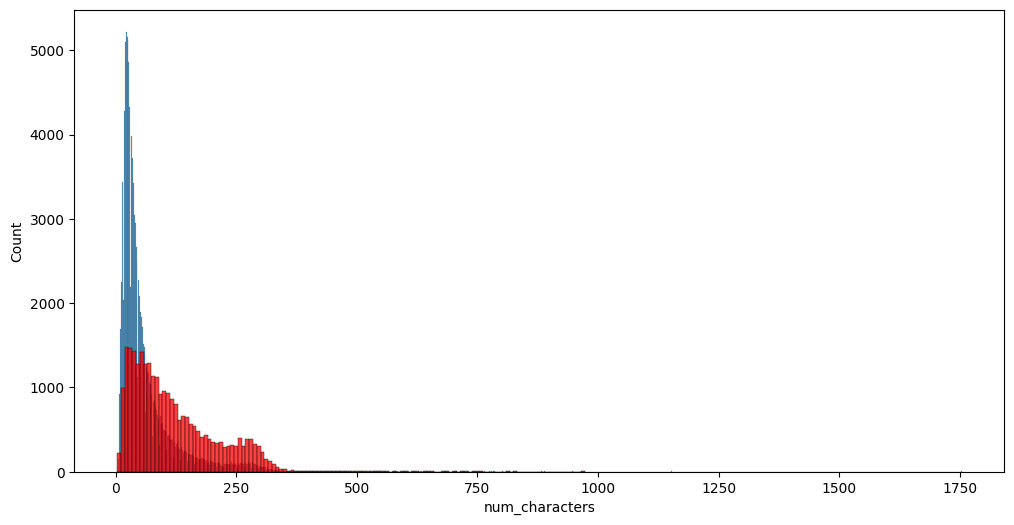

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(combined_app_data[combined_app_data['sentiment_textblob'] == 'positive']['num_characters'])
sns.histplot(combined_app_data[combined_app_data['sentiment_textblob'] == 'negative']['num_characters'],color='red')
plt.show()

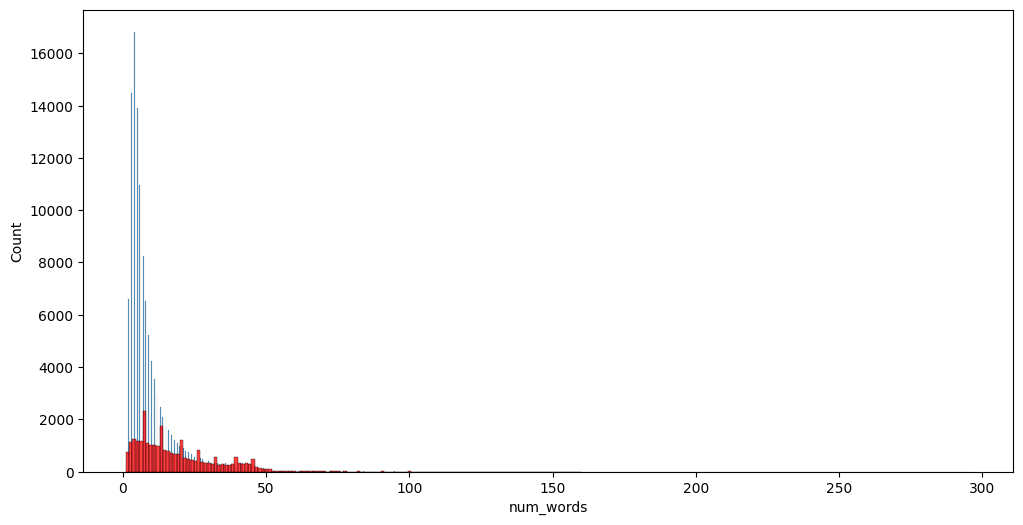

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(combined_app_data[combined_app_data['sentiment_textblob'] == 'positive']['num_words'])
sns.histplot(combined_app_data[combined_app_data['sentiment_textblob'] == 'negative']['num_words'],color='red')
plt.show()

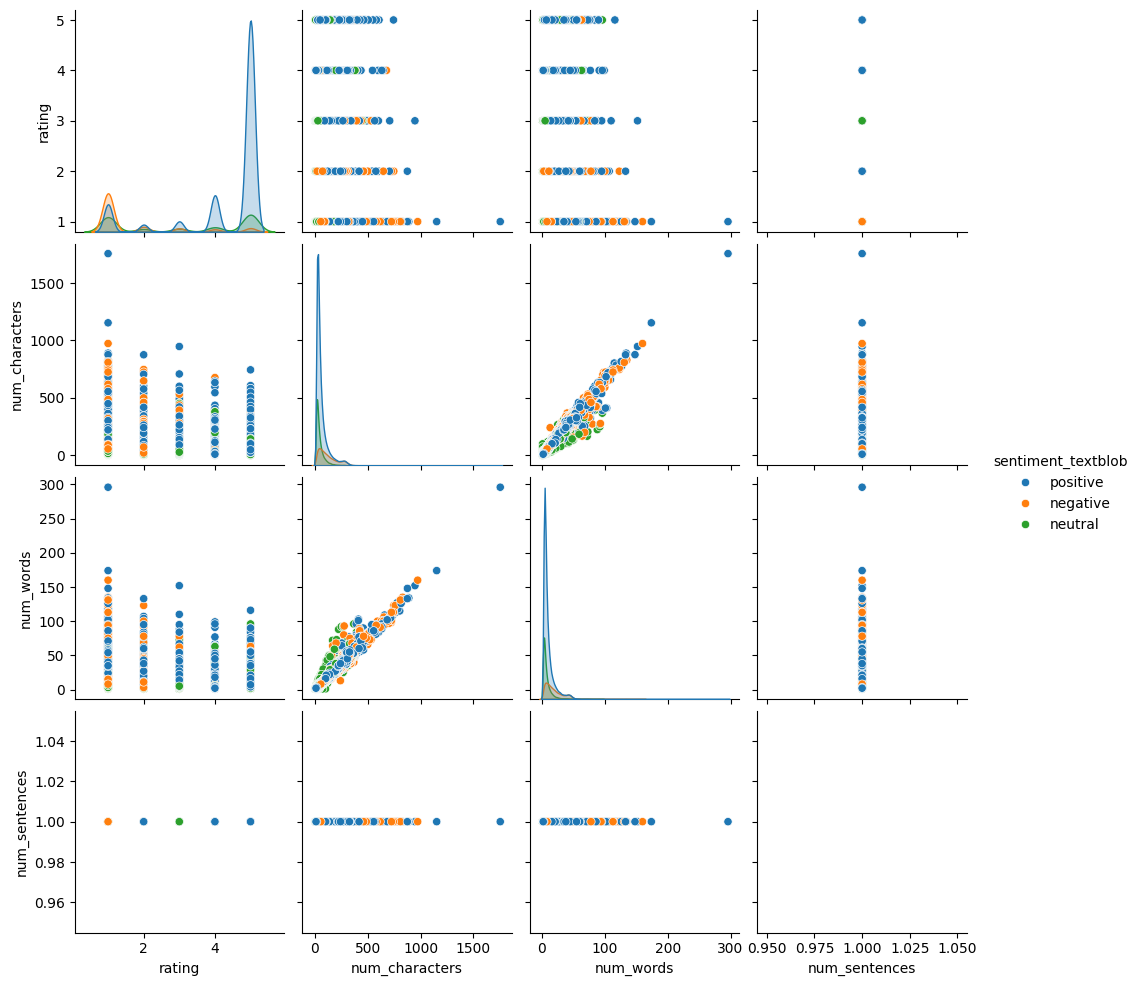

In [28]:
combined_app_data1 = combined_app_data.drop(columns=['ID'])
sns.pairplot(combined_app_data1,hue='sentiment_textblob')

<Axes: >

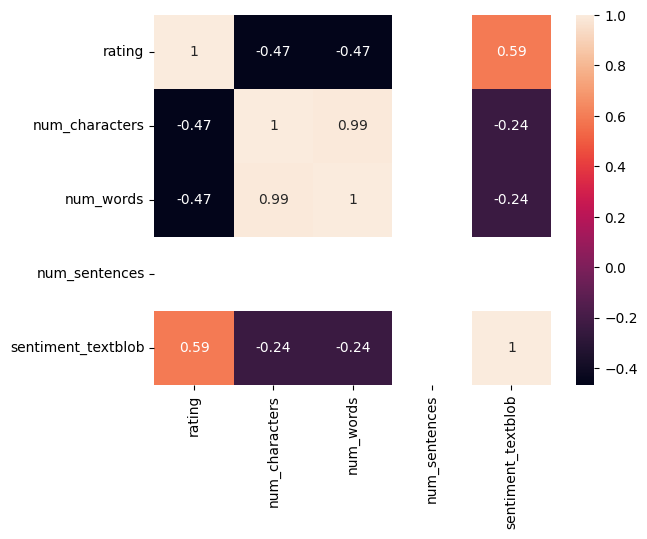

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_app_data1['sentiment_textblob'] = encoder.fit_transform(combined_app_data1['sentiment_textblob'])
combined_app_data2 = combined_app_data1.drop(columns=['CleanText', 'source'])
sns.heatmap(combined_app_data2.corr(),annot=True)

making a copy of this combined_app_data and saving it as a csv file, so that it can be used afterwards just by importing it

In [33]:
combined_app_data_textblob = combined_app_data.copy()

In [34]:
combined_app_data_textblob.to_csv('combined_app_data_textblob.csv', index=False)

counting sentiments value of combined data

In [35]:
textblob_counts_combined = combined_app_data['sentiment_textblob'].value_counts()
textblob_counts_combined

sentiment_textblob
positive    118257
neutral      31289
negative     27554
Name: count, dtype: int64

visualizing sentiments counts & percentages of combined app data through graph and chart 

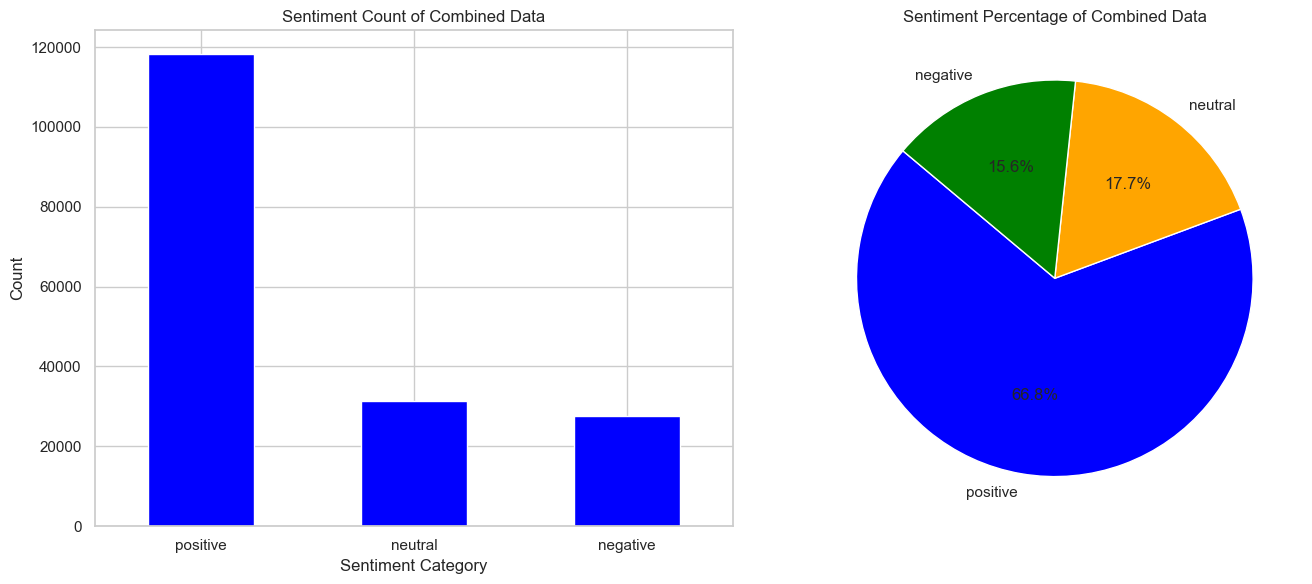

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plot_df = pd.DataFrame({
    'Sentiment_TextBlob_count': textblob_counts_combined,
    'Sentiment_TextBlob_percentage': (textblob_counts_combined / textblob_counts_combined.sum()) * 100
    })

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Graph for Counts
plot_df['Sentiment_TextBlob_count'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Sentiment Count of Combined Data')
axes[0].set_xticks(range(len(plot_df)))
axes[0].set_xticklabels(plot_df.index, rotation=0)

# Pie Chart for Percentages
axes[1].pie(plot_df['Sentiment_TextBlob_percentage'], labels=plot_df.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
axes[1].set_title('Sentiment Percentage of Combined Data')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Creating a function for finding top sentiments unigrams and bigrams for apps data

In [37]:
from wordcloud import WordCloud, STOPWORDS

def process_sentiment(data, sentiment):
    # Filter sentiment data
    sentiment_df = data[data['sentiment_textblob'] == sentiment]
    text = sentiment_df['CleanText'].tolist()
    text = " ".join(text)
    
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Create unigrams
    unigram = list(nltk.ngrams(words, 1))
    ugram = [item[0] for item in unigram]
    
    # Frequency distribution for unigrams
    unigram_freq = nltk.FreqDist(ugram)
    sorted_ug = sorted(unigram_freq.items(), key=lambda x: x[1], reverse=True)  # Descending order
    
    # Create DataFrame for unigrams
    ug_df = pd.DataFrame(sorted_ug, columns=[f'{sentiment.capitalize()}_word', 'count'])
    print(f"Top 15 Unigrams for {sentiment.capitalize()} sentiment in given app data:")
    print(ug_df[:15])
    
    # Generate word cloud for unigrams
    sw = set(STOPWORDS)
    unigram_wordcloud = WordCloud(random_state=1, background_color="white", max_words=40,
                                  min_font_size=10, max_font_size=50, stopwords=sw).generate_from_frequencies(unigram_freq)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.gca().imshow(unigram_wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment.capitalize()} Sentiment Wordcloud - Unigrams")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
    # Create bigrams
    bigram = list(nltk.ngrams(words, 2))
    bigram_list = [" ".join(item) for item in bigram]
    
    # Frequency distribution for bigrams
    bigram_freq = nltk.FreqDist(bigram_list)
    sorted_bg = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)  # Descending order
    
    # Create DataFrame for bigrams
    bg_df = pd.DataFrame(sorted_bg, columns=[f'{sentiment.capitalize()}_bigram', 'count'])
    print(f"Top 15 Bigrams for {sentiment.capitalize()} sentiment in given app data:")
    print(bg_df[:15])
    
    # Generate word cloud for bigrams
    bigram_wordcloud = WordCloud(random_state=1, background_color="white", max_words=40,
                                 min_font_size=10, max_font_size=50, stopwords=sw).generate_from_frequencies(bigram_freq)
    plt.figure(figsize=(10, 6), facecolor=None)
    plt.gca().imshow(bigram_wordcloud, interpolation="bilinear")
    plt.title(f"{sentiment.capitalize()} Sentiment Wordcloud - Bigrams")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
    # Plot bar chart for top 15 unigrams
    plt.figure(figsize=(12, 8))
    top_15_unigrams = ug_df[:15]
    plt.barh(top_15_unigrams[f'{sentiment.capitalize()}_word'], top_15_unigrams['count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Top 15 Unigrams for {sentiment.capitalize()} Sentiment')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Plot bar chart for top 15 bigrams
    plt.figure(figsize=(12, 8))
    top_15_bigrams = bg_df[:15]
    plt.barh(top_15_bigrams[f'{sentiment.capitalize()}_bigram'], top_15_bigrams['count'], color='lightgreen')
    plt.xlabel('Count')
    plt.title(f'Top 15 Bigrams for {sentiment.capitalize()} Sentiment')
    plt.gca().invert_yaxis()
    plt.show()


Displaying top sentiments unigrams and bigrams in combined_apps_data

Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0           easy  32080
1            use  30896
2          great  25042
3           book  20938
4           good  19962
5           love  12382
6          hotel  10945
7           find  10707
8           stay  10627
9            get   9677
10          best   9257
11          make   8098
12          time   7404
13         price   7170
14          host   7080


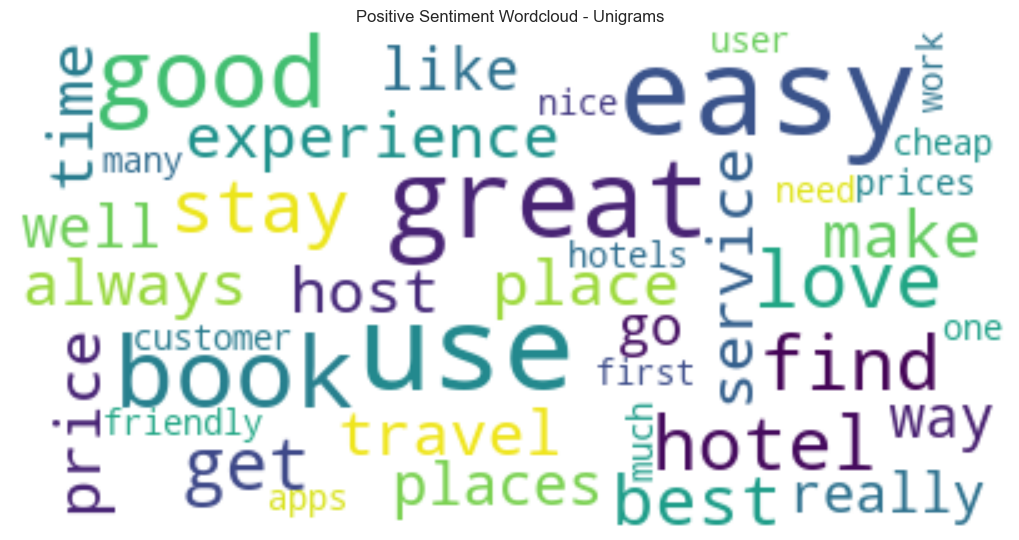

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use  12929
1      user friendly   3520
2   customer service   2388
3          easy book   2317
4         first time   2101
5        places stay   1882
6         place stay   1702
7         book hotel   1608
8          use great   1487
9      easy navigate   1440
10            air bb   1323
11         easy find   1290
12         great way   1063
13          time use   1056
14  great experience   1052


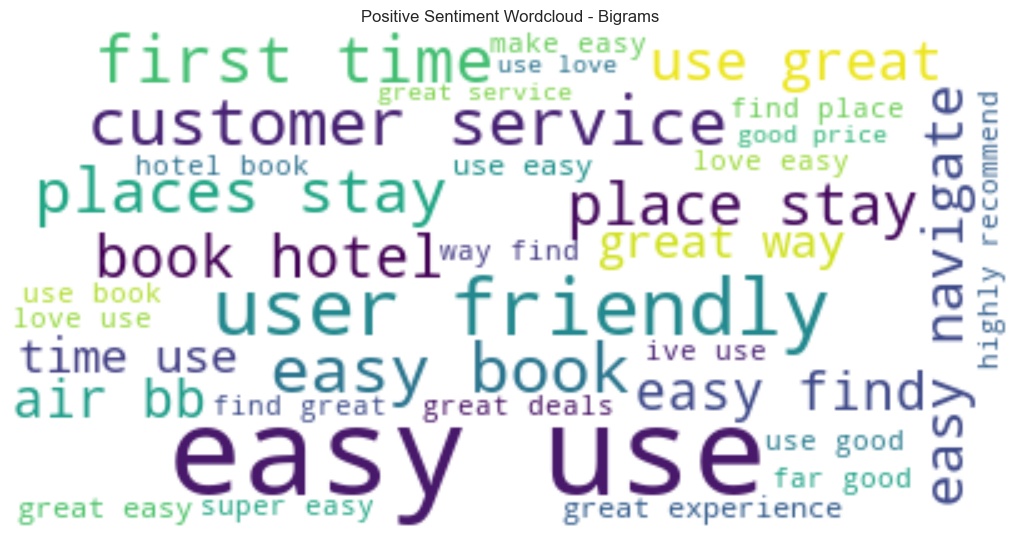

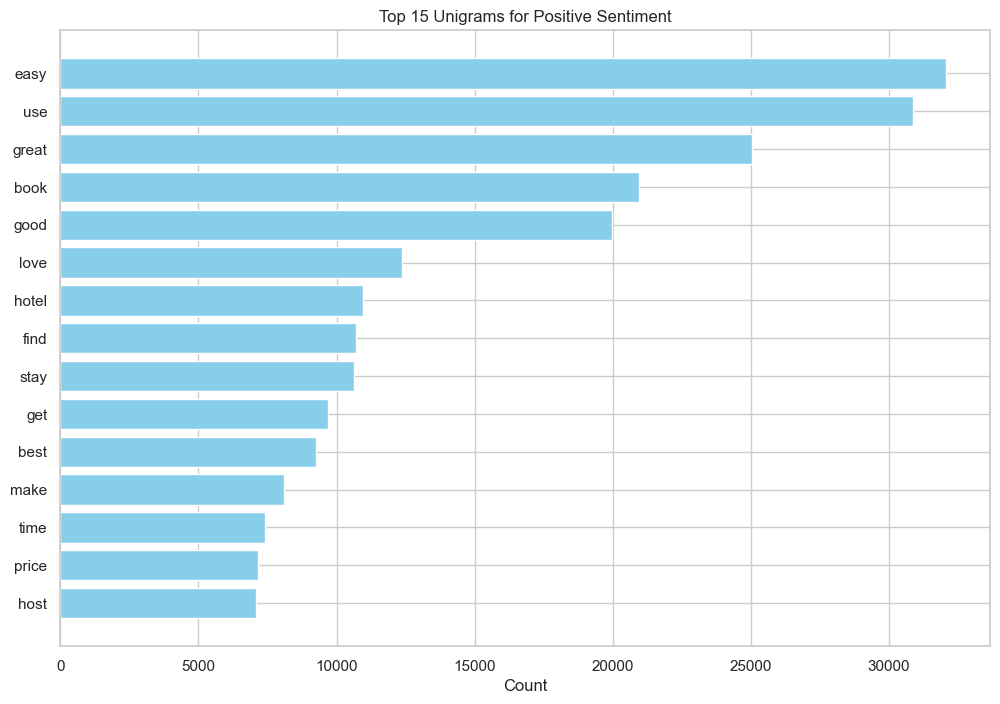

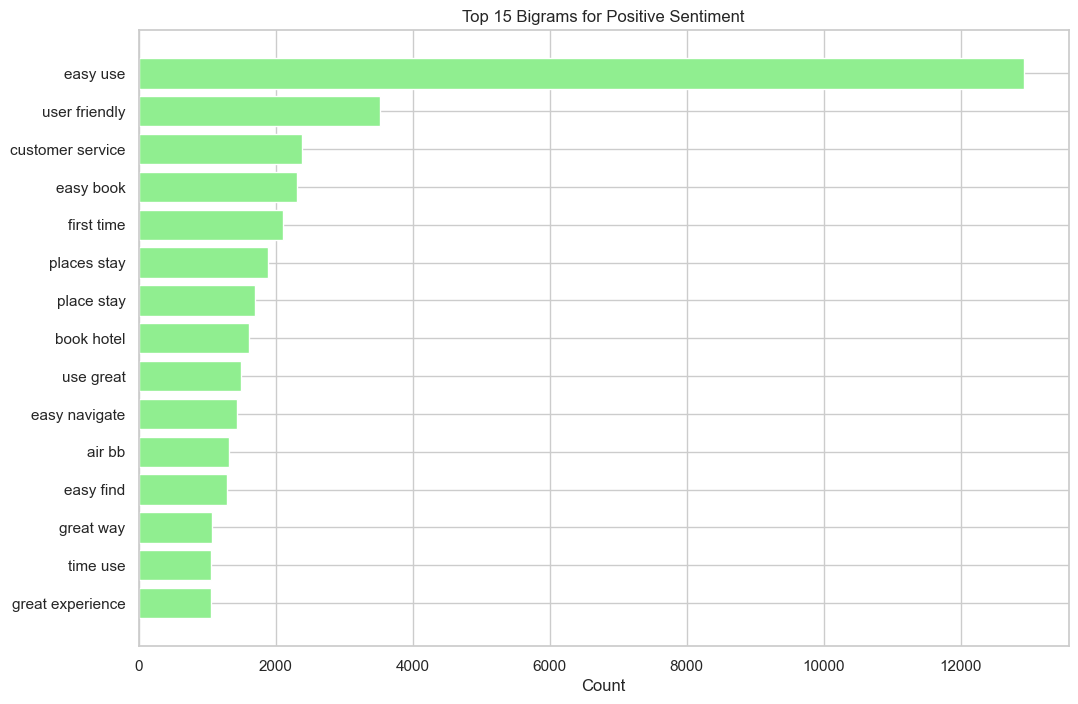

Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0           book  11785
1          hotel   6899
2            bad   6885
3            use   6684
4            get   5781
5       customer   5583
6        service   5146
7           dont   4056
8     experience   3847
9          money   3377
10          time   3271
11          host   3190
12          even   3179
13           try   3121
14          make   3092


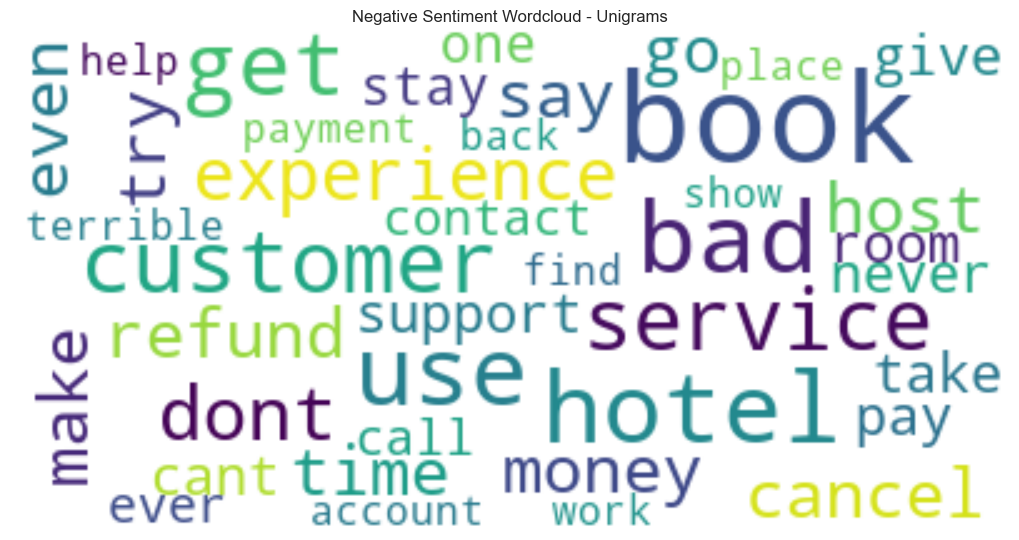

Top 15 Bigrams for Negative sentiment in given app data:
     Negative_bigram  count
0   customer service   2857
1     bad experience   1747
2         book hotel   1213
3      customer care   1113
4   customer support    883
5        cancel book    566
6        credit card    494
7          never use    468
8          book room    465
9         waste time    456
10        hotel book    449
11          dont use    440
12       bad service    402
13        get refund    397
14            air bb    383


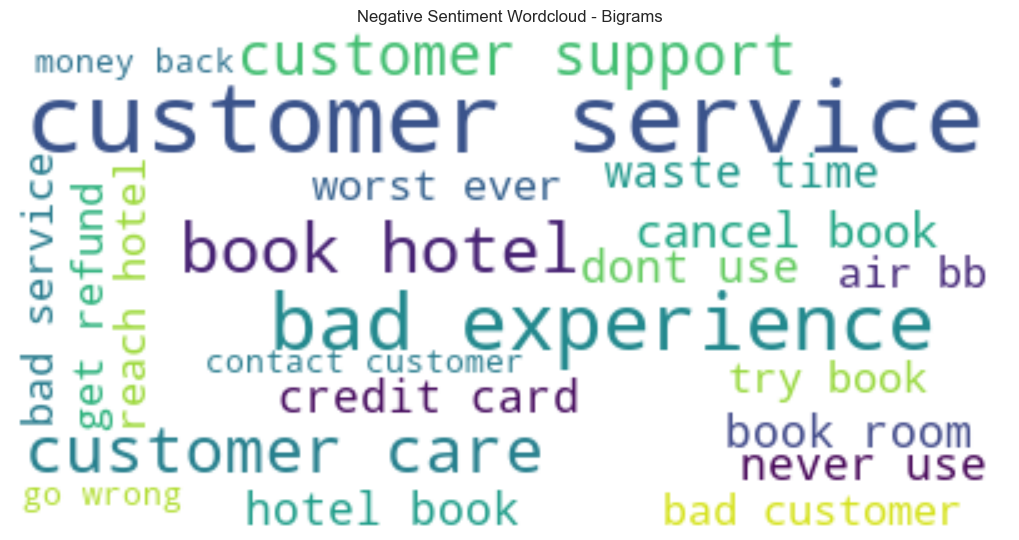

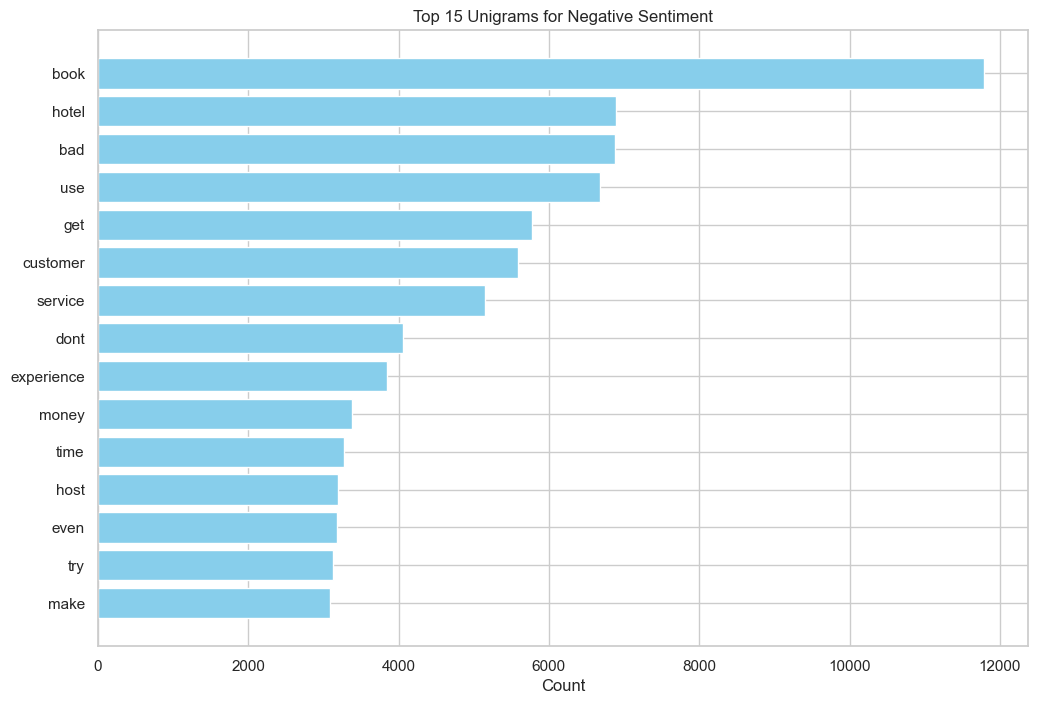

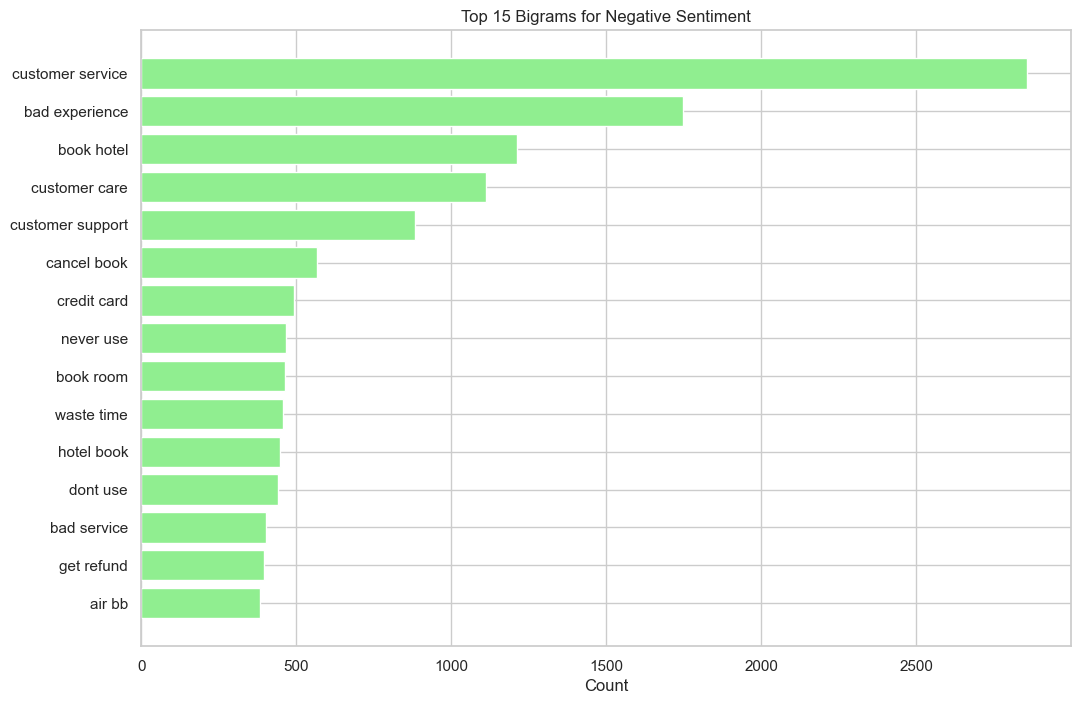

In [38]:
for sentiment in ['positive', 'negative']:
    process_sentiment(combined_app_data, sentiment)

Seperating all Apps data and drawing inferences from average length of words and characters across positive and negative sentiments

App1 DataFrame




ID                                          CleanText  rating  \
0            1                                       professional       5   
1            2  buggy far mostly customer support always late ...       1   
2            3                 great easy navigate use super easy       5   
3            4  airbus use affordable years ago shock discover...       1   
4            5  easy use great rates love meeting host super f...       5   
...        ...                                                ...     ...   
115349  147599  useful ive use quickly compose messages hosts ...       4   
115350  147600  great idea real shame fall short mark flips or...       1   
115351  147601  cant customize notification sound push notific...       3   
115352  147602  freezes white screen nova ideapad ive try inst...       1   
115353  147603         run background use phones memory dont open       1   

        num_characters  num_words  num_sentences sentiment_textblob  
0                   12          1              1           positive  
1                   88         13              1           positive  
2                   34          6              1           positive  
3                  137         21              1           negative  
4                   76         13              1           positive  
...                ...        ...            ...                ...  
115349              72         10              1           positive  
115350             191         29              1           positive  
115351             361         49              1           negative  
115352              69         11              1            neutral  
115353              42          7              1            neutral  

[115354 rows x 7 columns]




App2 DataFrame




ID                                          CleanText  rating  \
0          1  customer support available though marked websi...       1   
1          2                       trust issues sell fake hotel       1   
2          3                             take money hotel close       1   
3          4                                               slow       3   
4          5  bad hard talk customer service request refund ...       1   
...      ...                                                ...     ...   
61741  84689  try type venice search function crashes immedi...       1   
61742  84692  clean room many facilities u ask towel soap mi...       5   
61743  84693  good guide travels asia good choice hotels pic...       2   
61744  84694                                   useful times use       4   
61745  84696                                         great slow       4   

       num_characters  num_words  num_sentences sentiment_textblob  
0                 282         43              1           positive  
1                  28          5              1           negative  
2                  22          4              1            neutral  
3                   4          1              1           negative  
4                  69         11              1           negative  
...               ...        ...            ...                ...  
61741              56          8              1           negative  
61742             327         55              1           positive  
61743             242         38              1           positive  
61744              16          3              1           positive  
61745              10          2              1           positive  

[61746 rows x 7 columns]

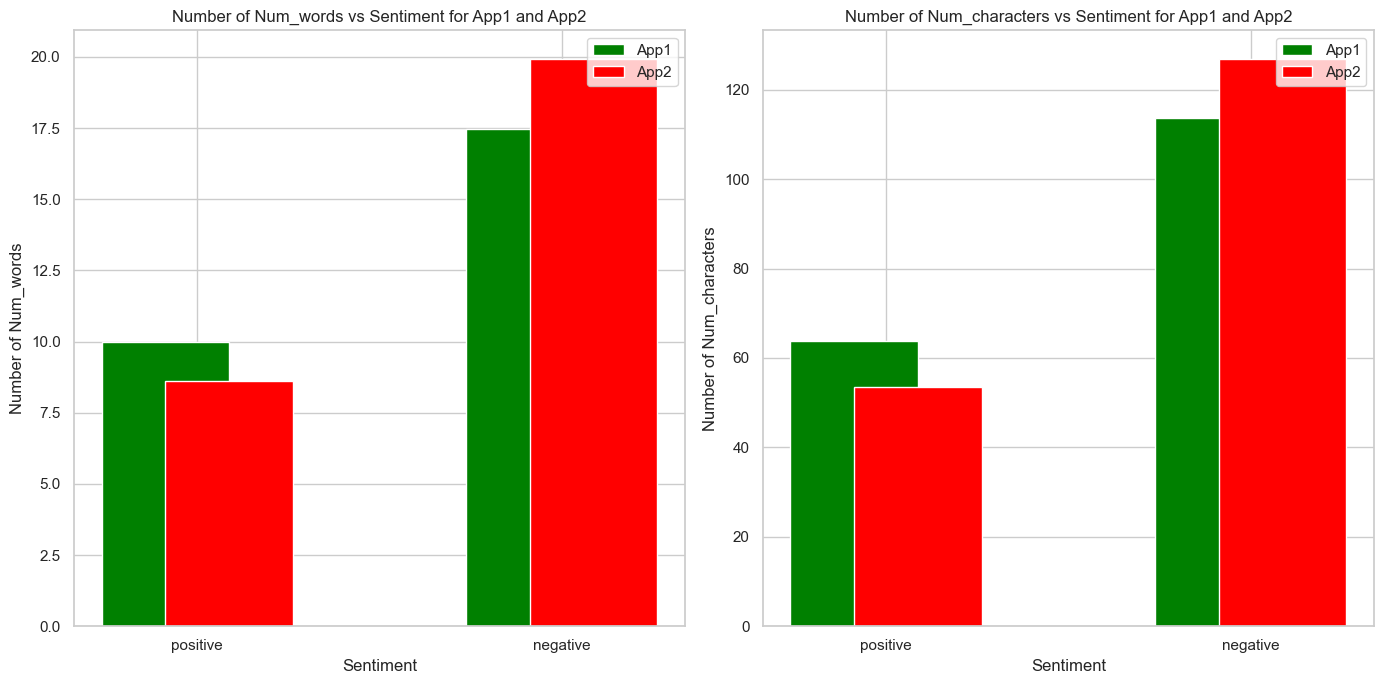

In [61]:
from IPython.display import display
separated_app_data = ['App1', 'App2']  # name accordingly for more apps
review_data_sources = ['ReviewData1', 'ReviewData2']  # List of corresponding review data sources

# Separate data based on source and reset index
separated_data = {
    app: combined_app_data[combined_app_data['source'] == review_source].drop(columns=['source']).reset_index(drop=True)
    for app, review_source in zip(separated_app_data, review_data_sources)
}

# Display separated data
for app, data in separated_data.items():
    print(f'{app} DataFrame\n\n')
    display(data)
    print('\n\n')

# Define metrics and colors
metrics = ['num_words', 'num_characters']
colors = ['green', 'red']

# Plotting the data side by side in the same graph
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Adjust the bar width and position
bar_width = 0.35
offset = bar_width / 2

# Loop through apps and metrics to create the bar plots
for i, (metric, ax) in enumerate(zip(metrics, axes)):
    for j, (app, color) in enumerate(zip(separated_app_data, colors)):
        app_pos = separated_data[app][separated_data[app]['sentiment_textblob'] == 'positive']
        app_neg = separated_data[app][separated_data[app]['sentiment_textblob'] == 'negative']
        
        # Combine the data for plotting
        app_counts = [app_pos[metric].mean(), app_neg[metric].mean()]
        
        x = ['positive', 'negative']
        x_app = [k + (j - 0.5) * offset for k in range(len(x))]
        
        ax.bar(x_app, app_counts, bar_width, label=app, color=color)
    
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)
    ax.set_title(f'Number of {metric.capitalize()} vs Sentiment for App1 and App2')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel(f'Number of {metric.capitalize()}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Displaying top sentiments unigrams and bigrams in all Apps

Ngrams and Wordcloud for positive sentiment in App1





Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0            use  21816
1           easy  20516
2          great  19625
3           good  11468
4           love  10044
5           book   9805
6           stay   9746
7           find   8439
8           host   6996
9            get   6545
10         place   5873
11          make   5859
12        travel   5823
13        places   5697
14    experience   5541


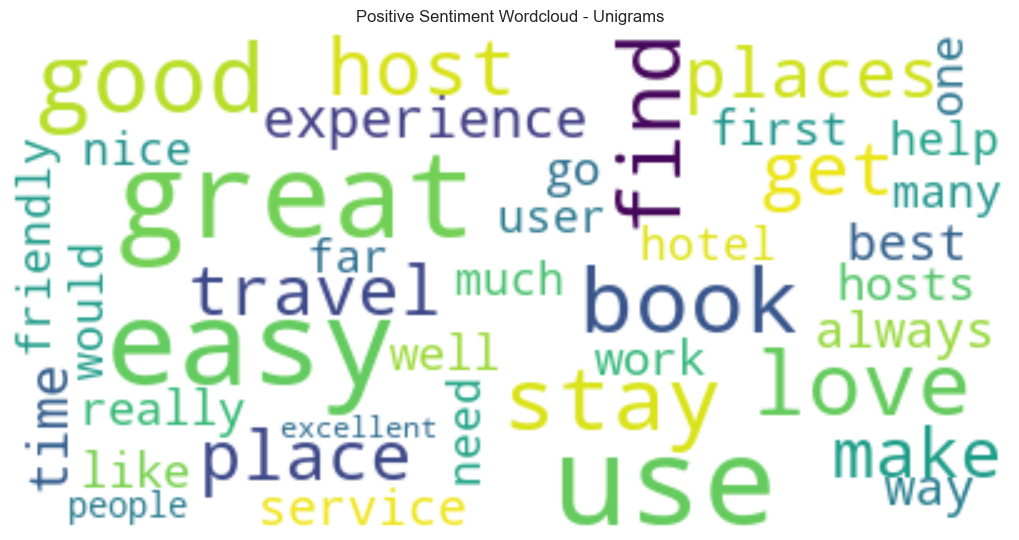

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use   8778
1      user friendly   2106
2        places stay   1846
3         first time   1616
4         place stay   1574
5   customer service   1464
6             air bb   1321
7          use great   1149
8      easy navigate   1107
9          great way   1026
10         easy book    998
11  great experience    919
12         easy find    911
13          time use    825
14        great easy    779


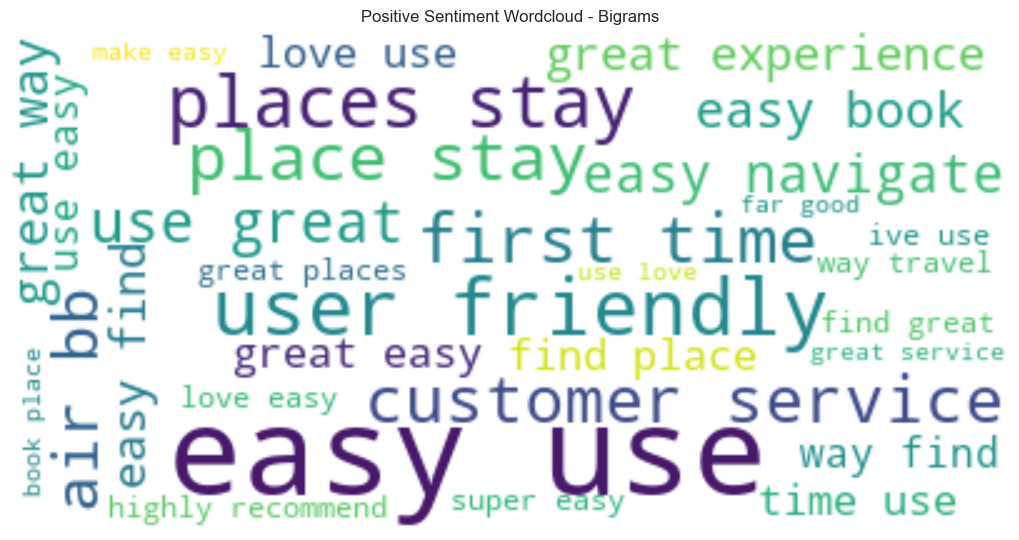

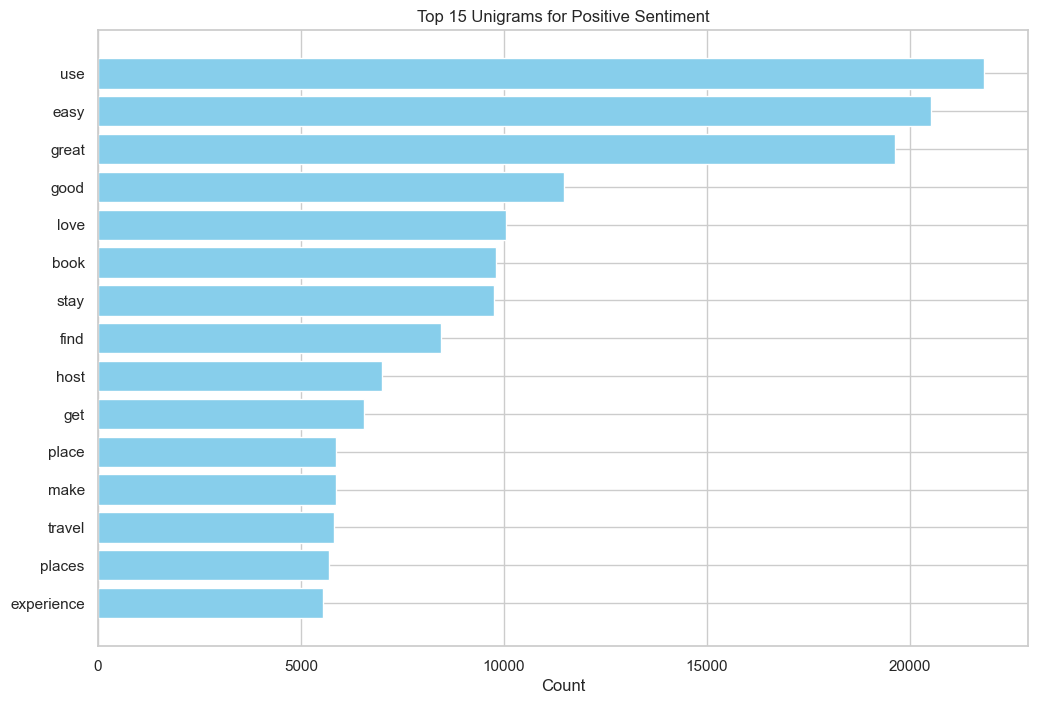

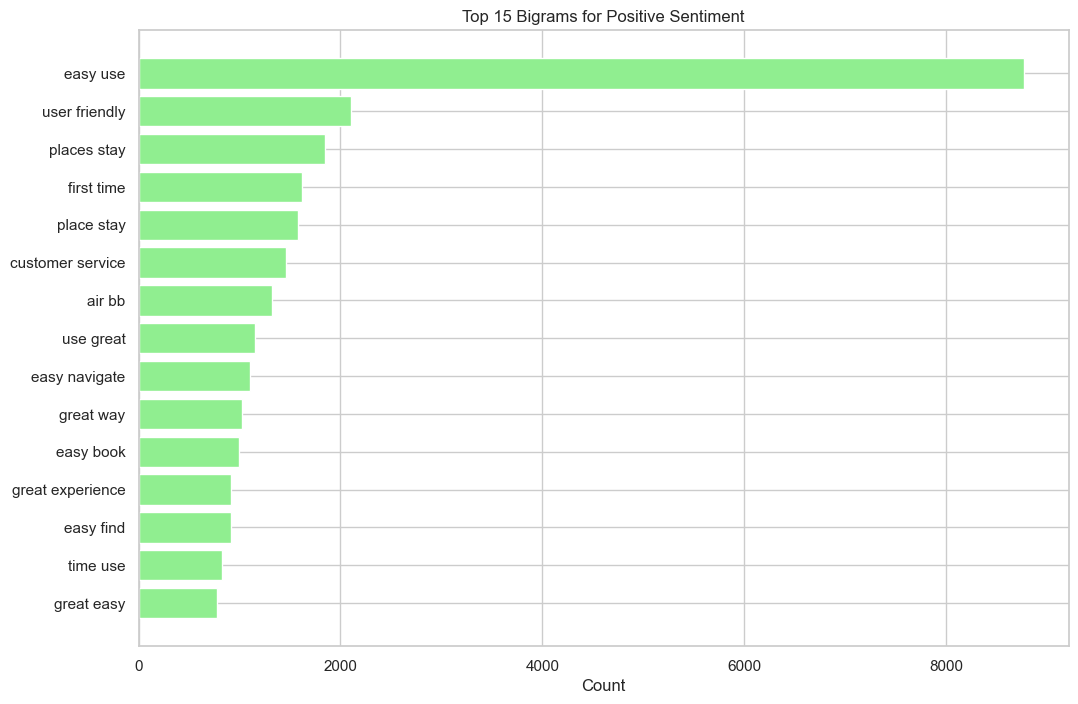







Ngrams and Wordcloud for positive sentiment in App2





Top 15 Unigrams for Positive sentiment in given app data:
   Positive_word  count
0           easy  11564
1           book  11133
2            use   9080
3           good   8494
4          hotel   8204
5          great   5417
6           best   4779
7          price   4591
8            get   3132
9           apps   3031
10         cheap   2710
11        hotels   2633
12       booking   2397
13          love   2338
14          fast   2297


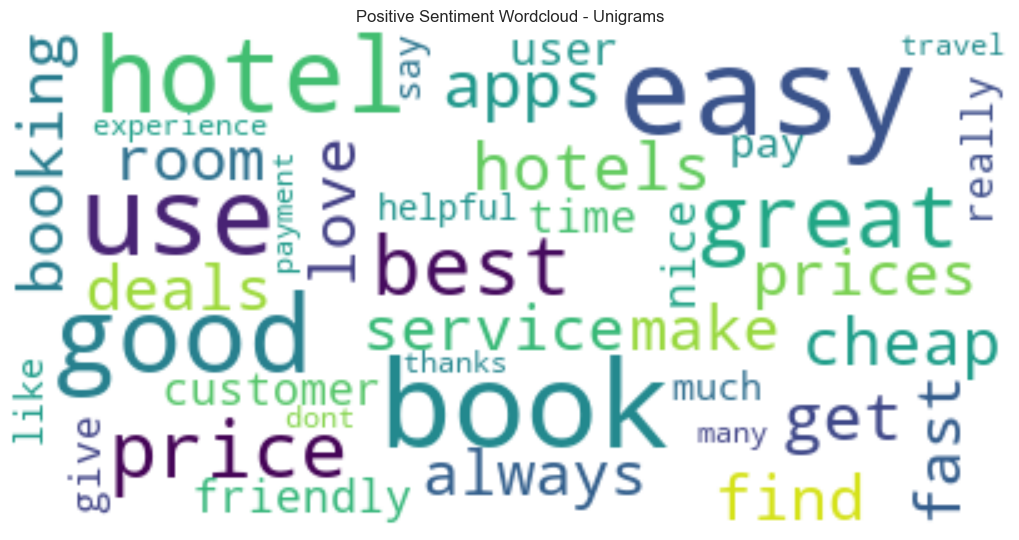

Top 15 Bigrams for Positive sentiment in given app data:
     Positive_bigram  count
0           easy use   4151
1         book hotel   1450
2      user friendly   1414
3          easy book   1319
4   customer service    924
5         hotel book    743
6         best price    600
7        great deals    573
8         good price    549
9        book hotels    529
10        first time    485
11       cheap price    422
12        good deals    421
13         fast easy    393
14         easy find    379


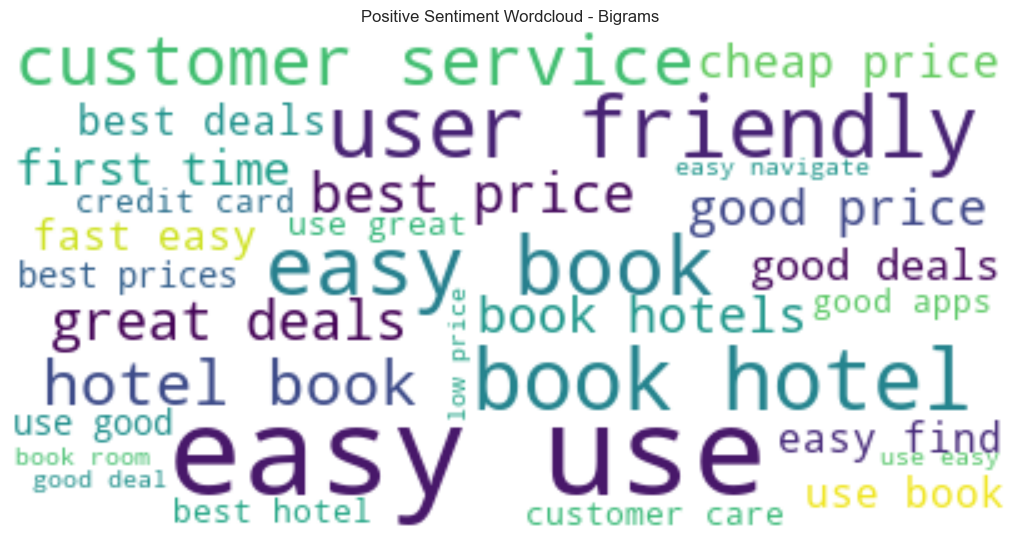

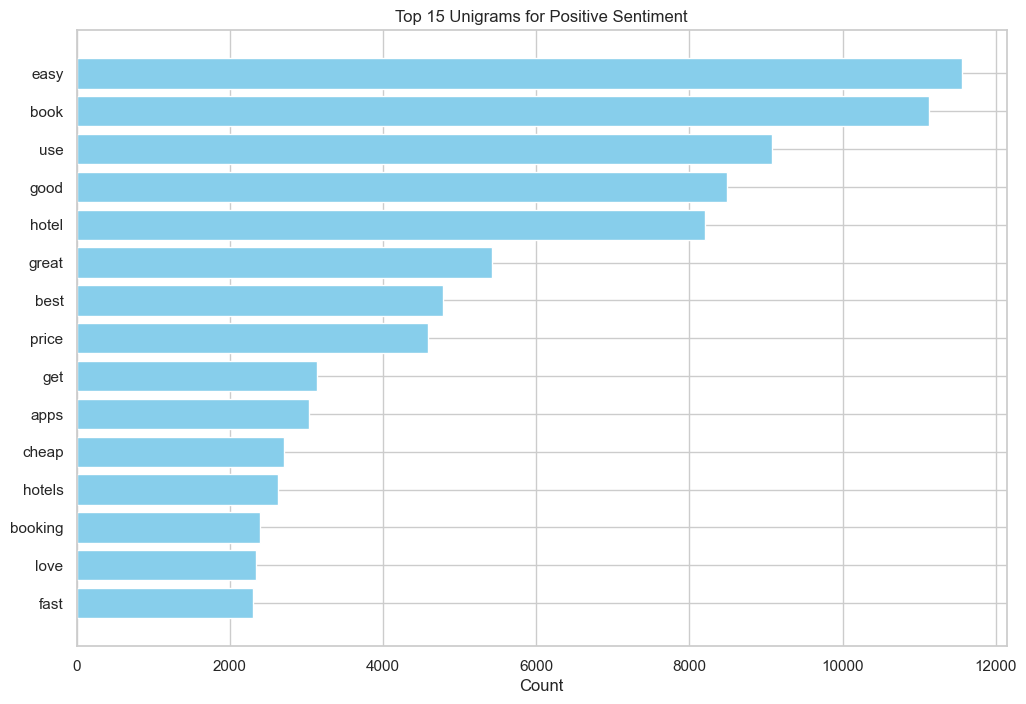

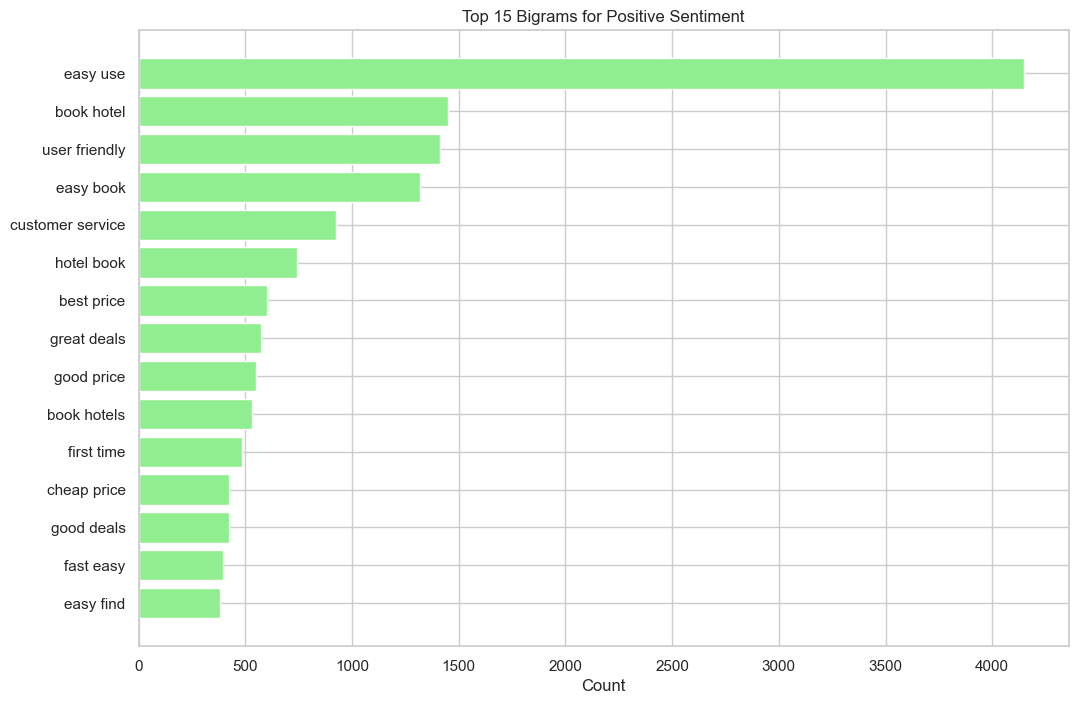







Ngrams and Wordcloud for negative sentiment in App1





Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0            use   4215
1           book   3617
2            get   3570
3           host   3082
4            bad   2784
5        service   2547
6       customer   2172
7            try   2111
8           time   1968
9           make   1894
10          cant   1874
11          even   1828
12          dont   1758
13            go   1746
14          take   1730


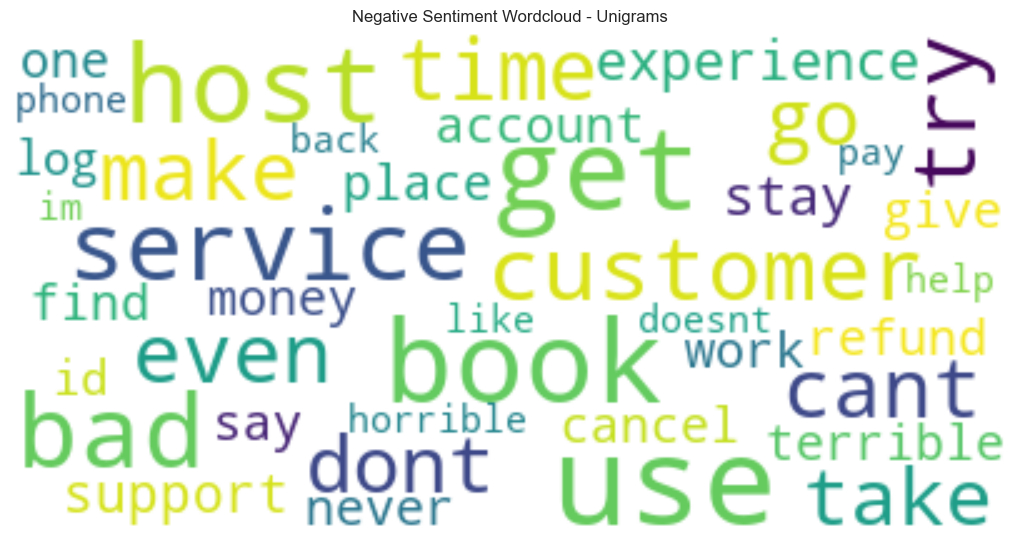

Top 15 Bigrams for Negative sentiment in given app data:
       Negative_bigram  count
0     customer service   1439
1       bad experience    506
2               air bb    381
3     customer support    355
4            never use    296
5           waste time    279
6          doesnt work    257
7         phone number    255
8             go wrong    250
9             try book    231
10         credit card    217
11           cant even    214
12  cancel reservation    206
13         even though    199
14            wont let    190


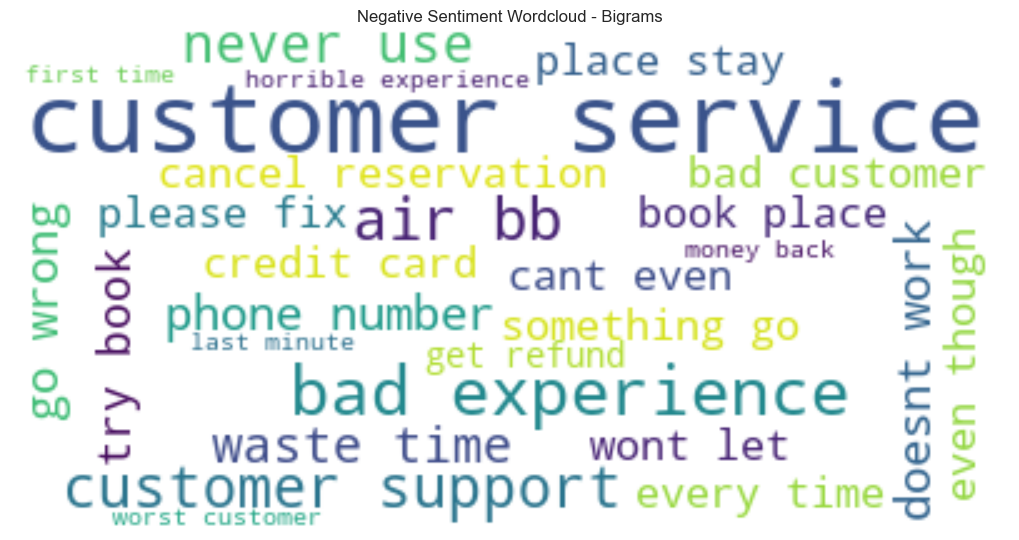

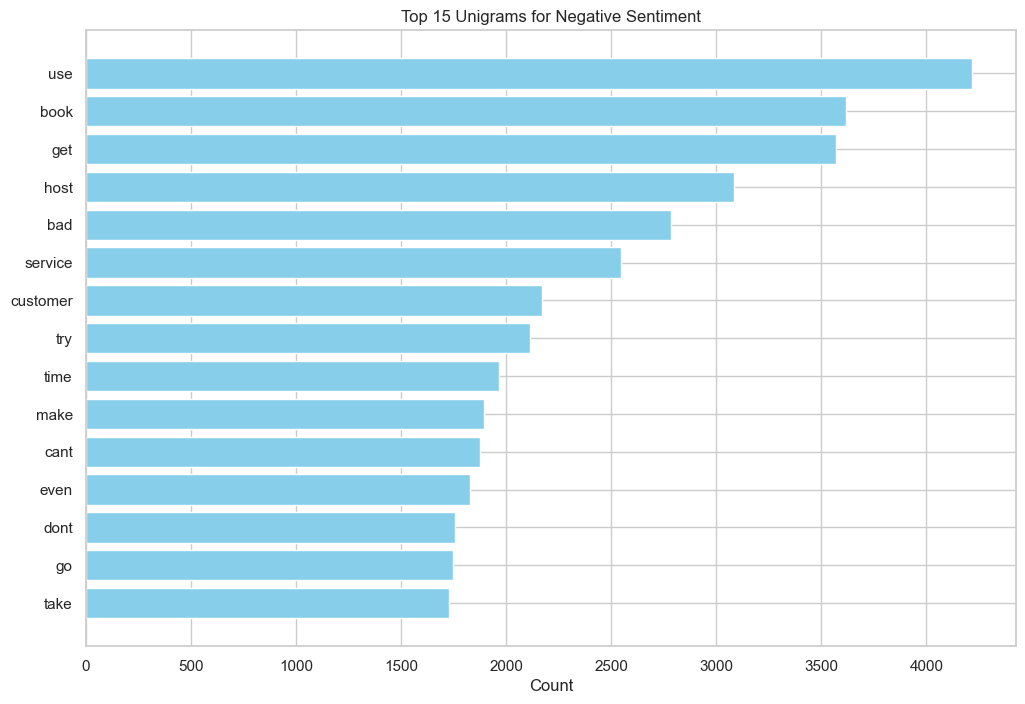

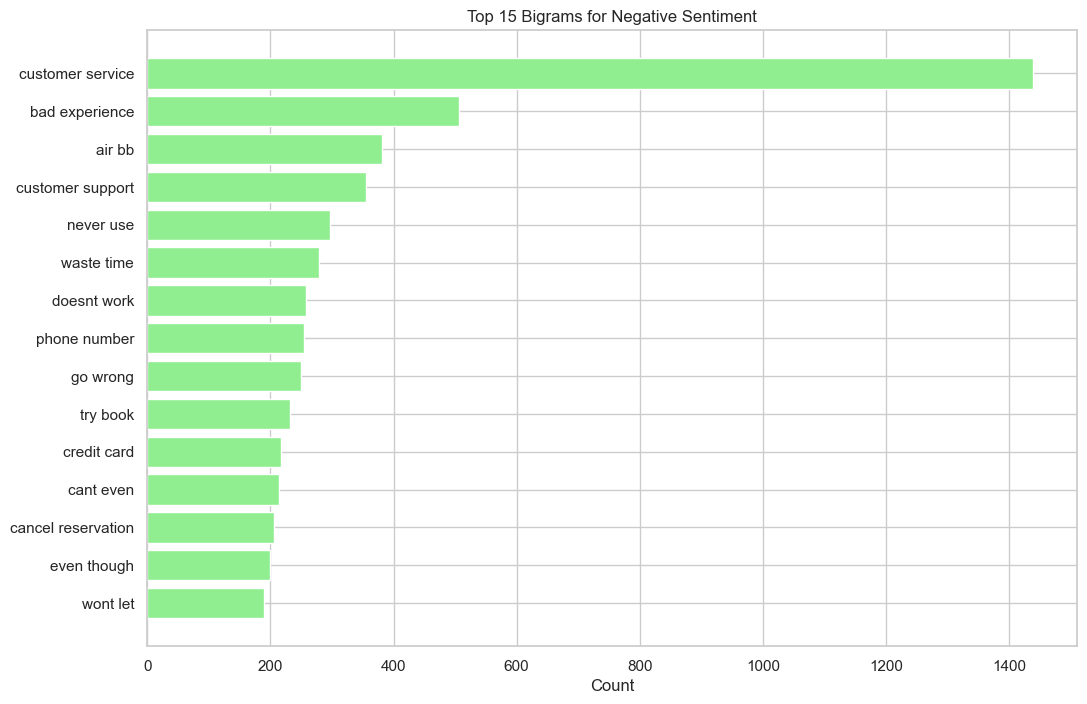







Ngrams and Wordcloud for negative sentiment in App2





Top 15 Unigrams for Negative sentiment in given app data:
   Negative_word  count
0           book   8168
1          hotel   6203
2            bad   4101
3       customer   3411
4        service   2599
5            use   2469
6           dont   2298
7            get   2211
8     experience   2124
9          money   1967
10          room   1957
11           say   1758
12        refund   1747
13        cancel   1600
14           pay   1589


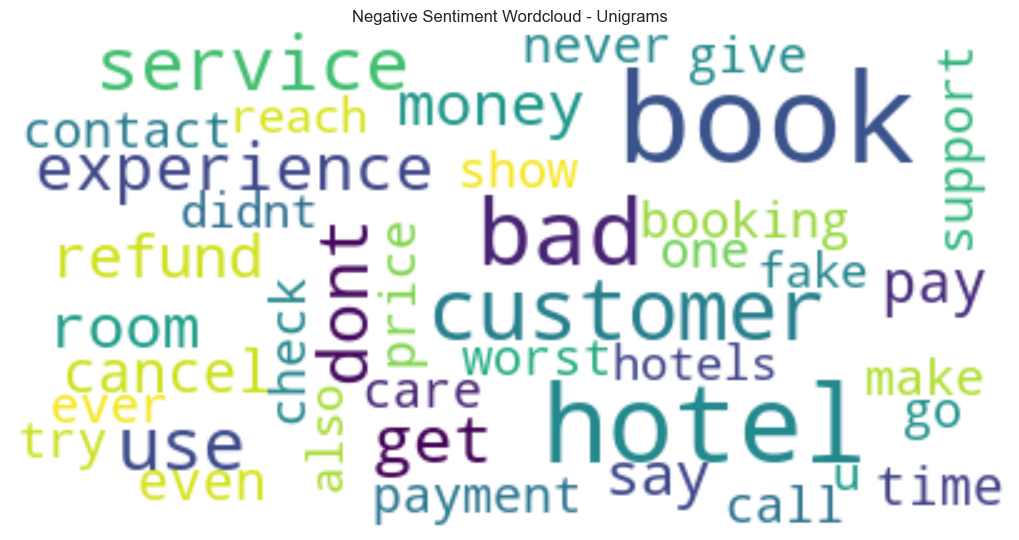

Top 15 Bigrams for Negative sentiment in given app data:
     Negative_bigram  count
0   customer service   1418
1     bad experience   1241
2         book hotel   1126
3      customer care   1018
4   customer support    528
5        cancel book    446
6         hotel book    434
7        reach hotel    351
8          book room    338
9           dont use    333
10       bad service    319
11   experience book    286
12       credit card    277
13  contact customer    276
14         dont book    273


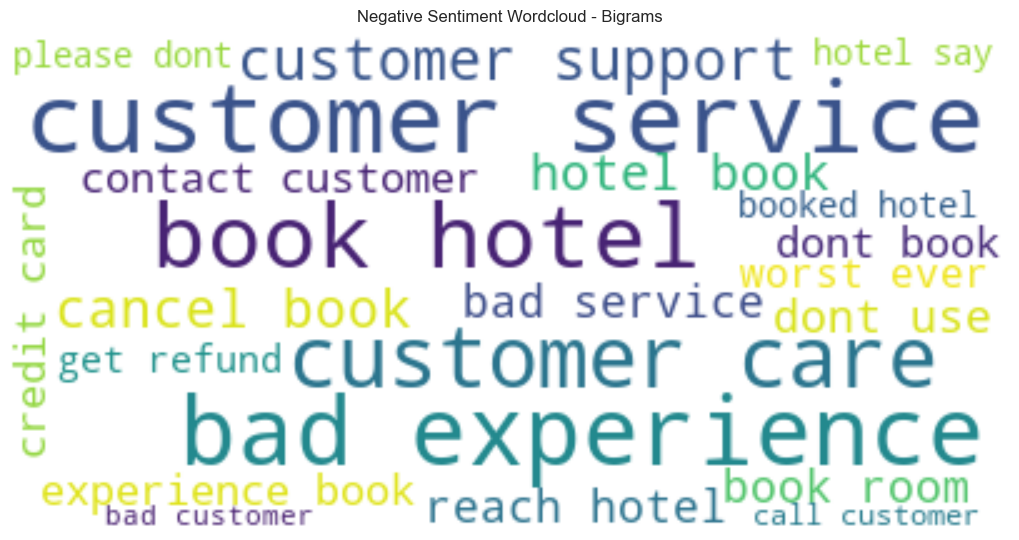

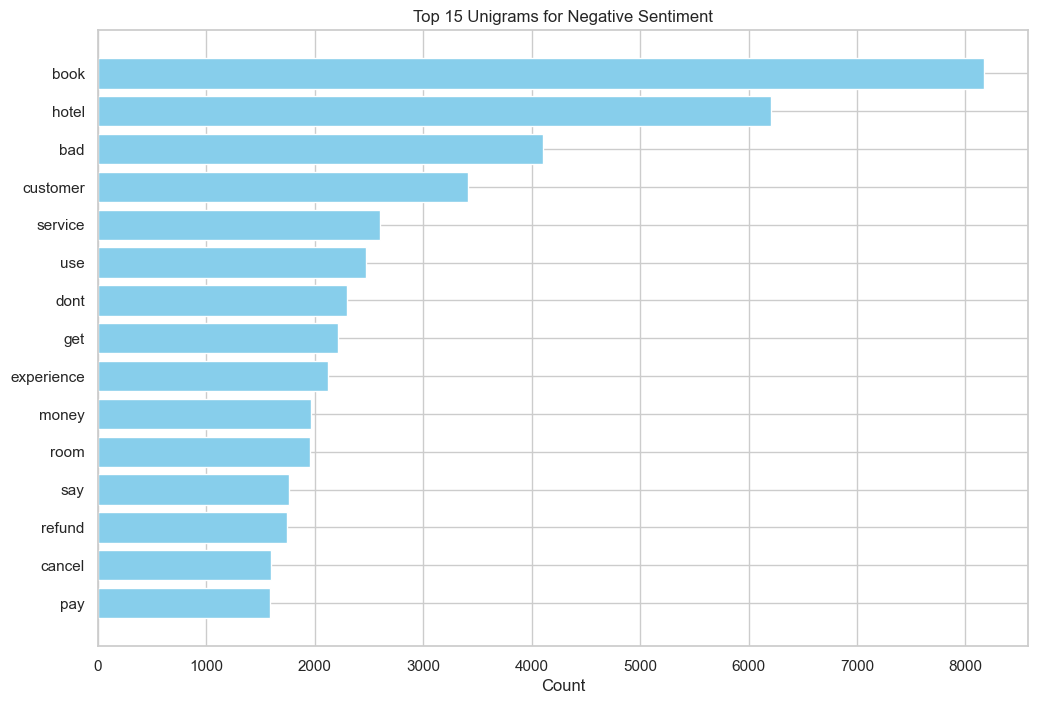

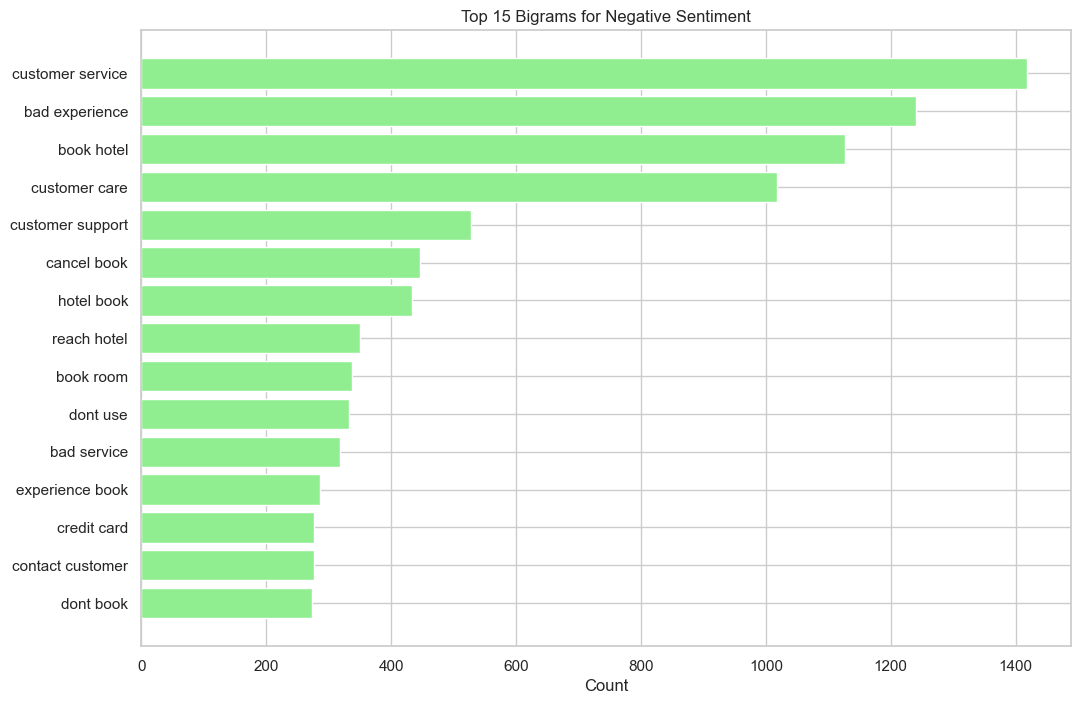

In [62]:
for sentiment in ['positive', 'negative']:
    for i in separated_app_data:
        print(f'\033[1mNgrams and Wordcloud for {sentiment} sentiment in {i}\033[0m\n\n\n\n\n')
        process_sentiment(separated_data[i], sentiment)
        print('\n\n\n\n\n')

Creating a function to calculate sentiments percentages in apps

In [67]:
def calculate_sentiment_percentages(sentiments_counts):
    percentages = (sentiments_counts / sentiments_counts.sum()) * 100
    return percentages

Creating comparison DataFrame of all apps

In [68]:
data = {}
for app_key in separated_app_data:
    app_name = app_key.split('_')[0]
    sentiment_counts = separated_data[app_key]['sentiment_textblob'].value_counts()
    data[app_name] = sentiment_counts
data_for_apps_info = []
for app, counts in data.items():
    percentages = calculate_sentiment_percentages(counts)
    app_data = {
        'app_name': app,
        'totalSenti_count': counts.sum(),
        'positiveSenti_count': counts['positive'],
        'negativeSenti_count': counts['negative'],
        'positiveSenti_percentage': percentages['positive'],
        'negativeSenti_percentage': percentages['negative']
    }
    data_for_apps_info.append(app_data)
    
app_info_df = pd.DataFrame(data_for_apps_info, columns=['app_name', 'totalSenti_count', 'positiveSenti_count', 'negativeSenti_count', 'positiveSenti_percentage', 'negativeSenti_percentage'])
display(app_info_df)

app_name  totalSenti_count  positiveSenti_count  negativeSenti_count  \
0     App1            115354                79077                17158   
1     App2             61746                39180                10396   

   positiveSenti_percentage  negativeSenti_percentage  
0                 68.551589                 14.874213  
1                 63.453503                 16.836718

Visualizing positive and negative sentiments percentages of both app data together

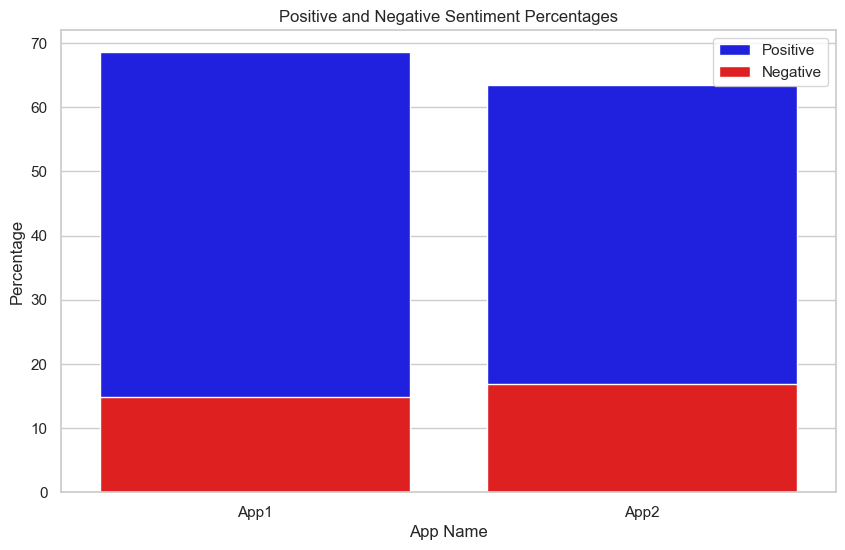

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='app_name', y='positiveSenti_percentage', data=app_info_df, color='blue', label='Positive')
sns.barplot(x='app_name', y='negativeSenti_percentage', data=app_info_df, color='red', label='Negative')
plt.xlabel('App Name')
plt.ylabel('Percentage')
plt.title('Positive and Negative Sentiment Percentages')
plt.legend()
plt.show()

Displaying sentiments percentages distribution of apps through charts

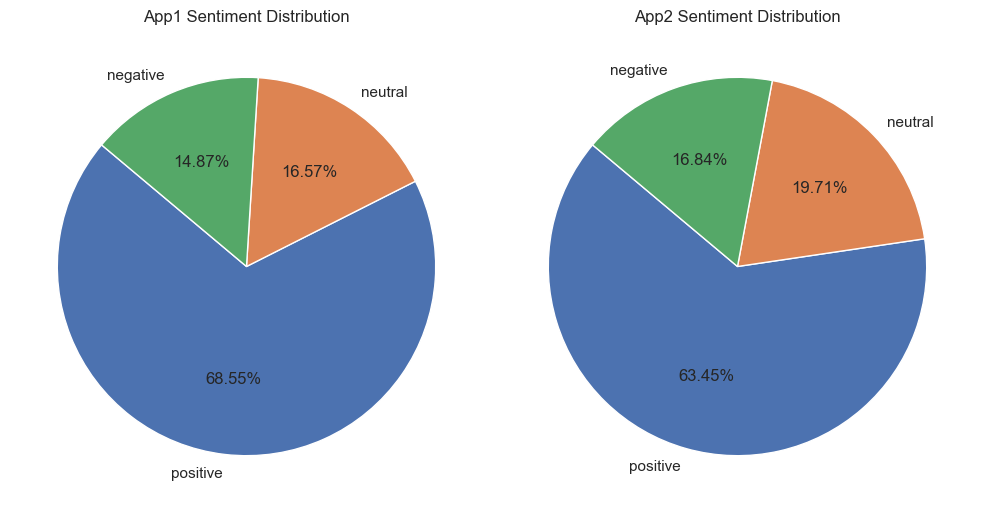

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for i, app in enumerate(data.keys()):
    counts = data[app]
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.2f%%', startangle=140)
    axes[i].set_title(f'{app} Sentiment Distribution')

plt.tight_layout()
plt.show()